In [301]:
import matplotlib.pyplot as plt
import numpy as np
import time
import torch.nn as nn
import torch
from torchdiffeq import odeint_adjoint as odeint_adj
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [302]:
potential = '2d_shell'

# Mean Sampling

In [42]:
# Normal HMC
num_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
trial = range(1, 5+1)
means = []
for n in num_samples:
    n_means = []
    for t in trial:
        samples = np.load(f'{potential}/{n}/{t}_hmc_samps.npy')
        n_means.append(samples.mean(axis=0))
    means.append(n_means)
means = np.array(means)
means_per_num_samples = means.mean(axis=1)
std_per_num_samples = means.std(axis=1)

Text(0, 0.5, 'dimension mean')

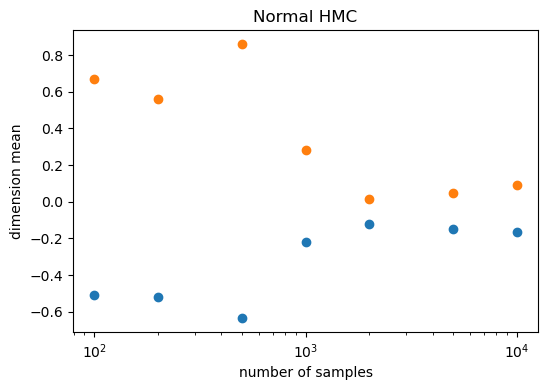

In [43]:
for i, e in enumerate(means_per_num_samples.T):
    plt.plot(num_samples, e, 'o')

plt.title('Normal HMC')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

Text(0, 0.5, 'dimension mean')

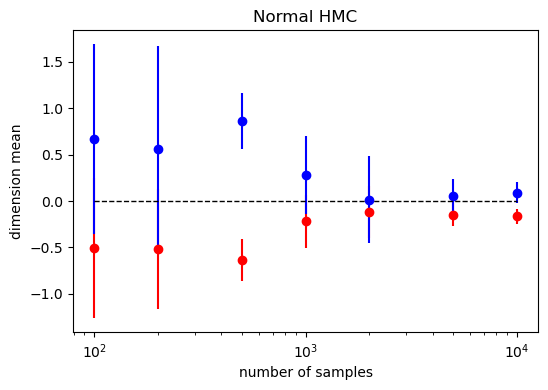

In [44]:
plt.errorbar(num_samples, means_per_num_samples[:, 0], std_per_num_samples[:, 0], fmt='.r')
plt.errorbar(num_samples, means_per_num_samples[:, 1], std_per_num_samples[:, 1], fmt='.b')
plt.plot(num_samples, means_per_num_samples[:, 0], 'ro')
plt.plot(num_samples, means_per_num_samples[:, 1], 'bo')
plt.plot([num_samples[0], num_samples[-1]], [0, 0], 'k--', linewidth=1)
plt.title('Normal HMC')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

In [45]:
# Neural ODE HMC
num_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
num_samples_labels = num_samples.copy()
for i,e in enumerate(num_samples):
    num_samples[i] = f'neural_{e}'
trial = range(1, 5+1)
means = []
for n in num_samples:
    n_means = []
    for t in trial:
        samples = np.load(f'{potential}/{n}/{t}_hmc_samps.npy')
        n_means.append(samples.mean(axis=0))
    means.append(n_means)
means = np.array(means)
means_per_num_samples = means.mean(axis=1)
std_per_num_samples = means.std(axis=1)

Text(0, 0.5, 'dimension mean')

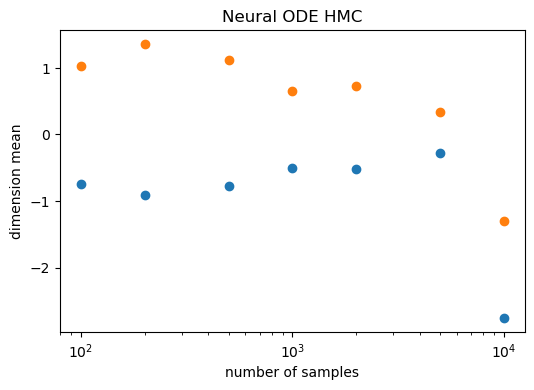

In [46]:
for i, e in enumerate(means_per_num_samples.T):
    plt.plot(num_samples_labels, e, 'o')

plt.title('Neural ODE HMC')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

Text(0, 0.5, 'dimension mean')

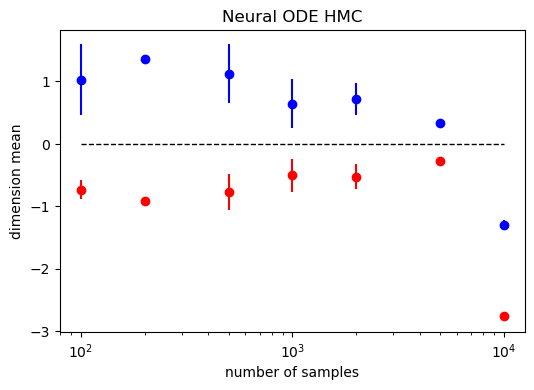

In [47]:
plt.errorbar(num_samples_labels, means_per_num_samples[:, 0], std_per_num_samples[:, 0], fmt='.r')
plt.errorbar(num_samples_labels, means_per_num_samples[:, 1], std_per_num_samples[:, 1], fmt='.b')
plt.plot(num_samples_labels, means_per_num_samples[:, 0], 'ro')
plt.plot(num_samples_labels, means_per_num_samples[:, 1], 'bo')
plt.plot([num_samples_labels[0], num_samples_labels[-1]], [0, 0], 'k--', linewidth=1)
plt.title('Neural ODE HMC')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

In [48]:
# Neural ODE Only
num_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
num_samples_labels = num_samples.copy()
for i,e in enumerate(num_samples):
    num_samples[i] = f'ode_{e}'
trial = range(1, 5+1)
means = []
for n in num_samples:
    n_means = []
    for t in trial:
        samples = np.load(f'{potential}/{n}/{t}_hmc_samps.npy')
        n_means.append(samples.mean(axis=0))
    means.append(n_means)
means = np.array(means)
means_per_num_samples = means.mean(axis=1)
std_per_num_samples = means.std(axis=1)

Text(0, 0.5, 'dimension mean')

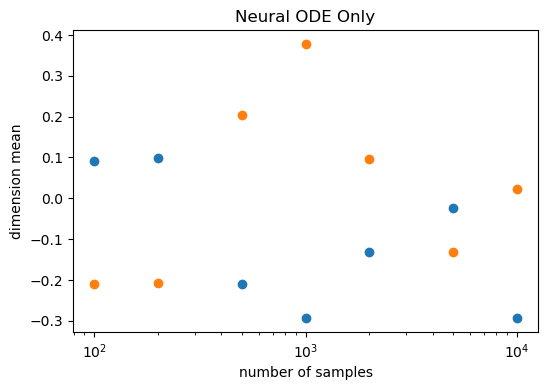

In [49]:
for i, e in enumerate(means_per_num_samples.T):
    plt.plot(num_samples_labels, e, 'o')

plt.title('Neural ODE Only')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

Text(0, 0.5, 'dimension mean')

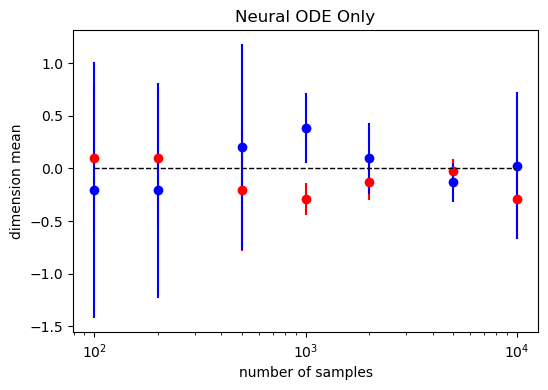

In [50]:
plt.errorbar(num_samples_labels, means_per_num_samples[:, 0], std_per_num_samples[:, 0], fmt='.r')
plt.errorbar(num_samples_labels, means_per_num_samples[:, 1], std_per_num_samples[:, 1], fmt='.b')
plt.plot(num_samples_labels, means_per_num_samples[:, 0], 'ro')
plt.plot(num_samples_labels, means_per_num_samples[:, 1], 'bo')
plt.plot([num_samples_labels[0], num_samples_labels[-1]], [0, 0], 'k--', linewidth=1)
plt.title('Neural ODE Only')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

In [51]:
# Neural ODE HMC Constrained
num_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
num_samples_labels = num_samples.copy()
for i,e in enumerate(num_samples):
    num_samples[i] = f'neural_constrained_{e}'
trial = range(1, 5+1)
means = []
for n in num_samples:
    n_means = []
    for t in trial:
        samples = np.load(f'{potential}/{n}/{t}_hmc_samps.npy')
        n_means.append(samples.mean(axis=0))
    means.append(n_means)
means = np.array(means)
means_per_num_samples = means.mean(axis=1)
std_per_num_samples = means.std(axis=1)

Text(0, 0.5, 'dimension mean')

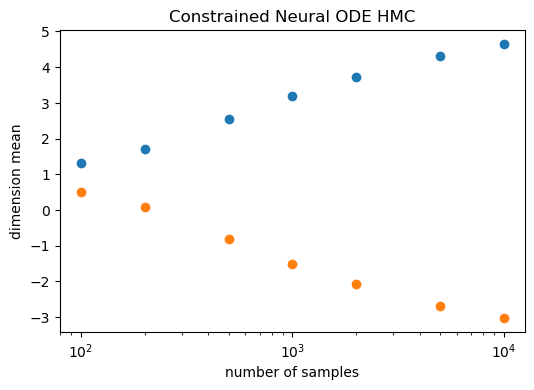

In [52]:
for i, e in enumerate(means_per_num_samples.T):
    plt.plot(num_samples_labels, e, 'o')

plt.title('Constrained Neural ODE HMC')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

Text(0, 0.5, 'dimension mean')

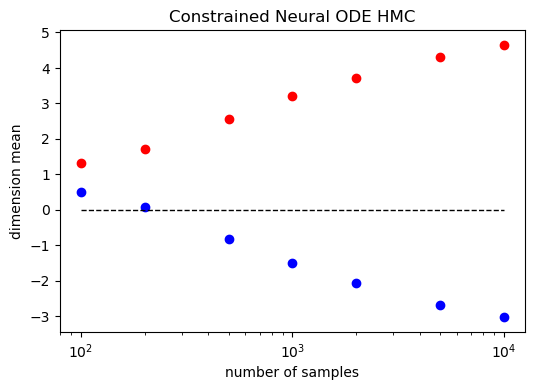

In [53]:
plt.errorbar(num_samples_labels, means_per_num_samples[:, 0], std_per_num_samples[:, 0], fmt='.r')
plt.errorbar(num_samples_labels, means_per_num_samples[:, 1], std_per_num_samples[:, 1], fmt='.b')
plt.plot(num_samples_labels, means_per_num_samples[:, 0], 'ro')
plt.plot(num_samples_labels, means_per_num_samples[:, 1], 'bo')
plt.plot([num_samples_labels[0], num_samples_labels[-1]], [0, 0], 'k--', linewidth=1)
plt.title('Constrained Neural ODE HMC')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

In [54]:
# Neural ODE Only Constrained
num_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
num_samples_labels = num_samples.copy()
for i,e in enumerate(num_samples):
    num_samples[i] = f'ode_constrained_{e}'
trial = range(1, 5+1)
means = []
for n in num_samples:
    n_means = []
    for t in trial:
        samples = np.load(f'{potential}/{n}/{t}_hmc_samps.npy')
        n_means.append(samples.mean(axis=0))
    means.append(n_means)
means = np.array(means)
means_per_num_samples = means.mean(axis=1)
std_per_num_samples = means.std(axis=1)

Text(0, 0.5, 'dimension mean')

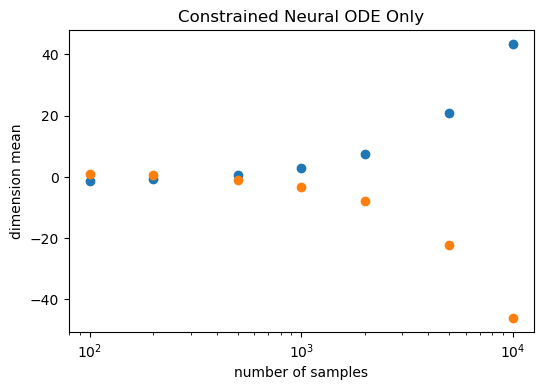

In [55]:
for i, e in enumerate(means_per_num_samples.T):
    plt.plot(num_samples_labels, e, 'o')

plt.title('Constrained Neural ODE Only')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

Text(0, 0.5, 'dimension mean')

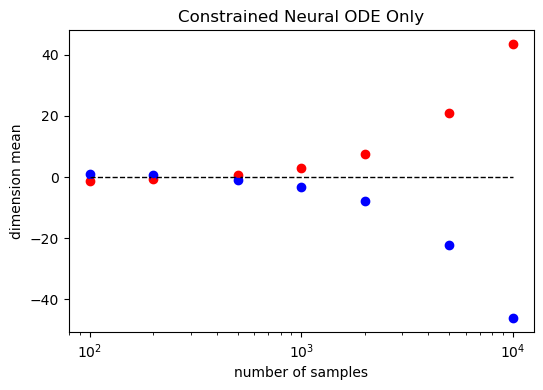

In [56]:
plt.errorbar(num_samples_labels, means_per_num_samples[:, 0], std_per_num_samples[:, 0], fmt='.r')
plt.errorbar(num_samples_labels, means_per_num_samples[:, 1], std_per_num_samples[:, 1], fmt='.b')
plt.plot(num_samples_labels, means_per_num_samples[:, 0], 'ro')
plt.plot(num_samples_labels, means_per_num_samples[:, 1], 'bo')
plt.plot([num_samples_labels[0], num_samples_labels[-1]], [0, 0], 'k--', linewidth=1)
plt.title('Constrained Neural ODE Only')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('dimension mean')

# Autocorrelation

In [20]:
# Autocorrelation
def plot_lag(samples):
    length = samples.shape[0]
    delay = []
    correlation = []
    start = time.perf_counter()
    average = samples.mean()
    for j in range(0,length):
        curr = 0
        for k in range(length-j):
            curr += (samples[k] - average)*(samples[k+j] - average)
        
        curr = curr / (length-j)
        
        correlation.append(curr/samples.var())
        delay.append(j)
    print(start - time.perf_counter())
    return delay,correlation

In [22]:
n = 10000
num_samples = [f'neural_constrained_{n}', f'ode_constrained_{n}']#[n, f'neural_{n}', f'ode_{n}', f'neural_constrained_{n}', f'ode_constrained_{n}']
trial = range(1, 5+1)
correlations = []
delay = range(int(n))
skip = 0
for n in num_samples:    
    samples = []
    c = []
    for t in trial:
        samples.append(np.load(f'{potential}/{n}/{t}_hmc_samps.npy'))
    samples = np.array(samples)
    for i in samples:
        c.append(plot_lag(i[:, 0])[1])
    c = np.array(c)
    correlations.append(c)
correlations = np.array(correlations) 

-18.57109864591621
-18.899343366967514
-18.565358855063096
-20.213199825026095
-18.386097165988758
-18.626596522983164
-18.114222324918956
-18.12417432316579
-21.978495526127517
-22.986413328908384


In [399]:
# n = 200
# num_samples = [f'neural_{n}']
# trial = range(1, 5+1)
# correlations = []
# delay = range(int(n))
# for n in num_samples:
#     samples = []
#     c = []
#     for t in trial:
#         samples.append(np.load(f'{potential}/{n}/{t}_hmc_samps.npy'))
#     samples = np.array(samples)
#     for i in samples:
#         c.append(plot_lag(i[:, 0])[1])
#     c = np.array(c)
#     correlations.append(c)
# correlations = np.array(correlations) 
# print(samples.std(axis=1))

-0.011149144964292645
-0.01118558191228658
-0.011089485953561962
-0.011051769950427115
-0.011082871933467686
[[0.5332748  0.40487027]
 [0.5179396  0.26300326]
 [0.560328   0.63424945]
 [0.6886058  0.22546355]
 [0.55327356 0.23364465]]


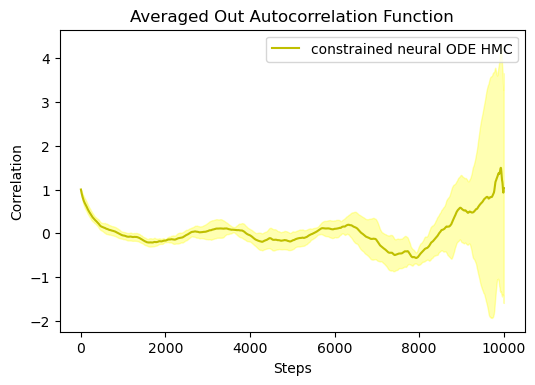

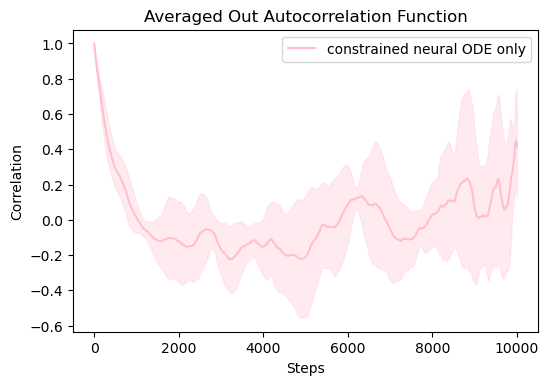

In [24]:
# AUtocrrelation mean approach
# y = correlations[0].mean(axis=0)
# std = correlations[0].std(axis=0)
# plt.plot(delay,correlations[0].mean(axis=0), 'b', label='normal HMC')
# plt.fill_between(delay, y-std, y+std, color='blue', alpha=0.3)

# plt.legend()
# plt.title("Averaged Out Autocorrelation Function")
# plt.xlabel("Steps")
# plt.ylabel("Correlation")
# plt.show()

# y = correlations[1].mean(axis=0)
# std = correlations[1].std(axis=0)
# plt.plot(delay,correlations[1].mean(axis=0), 'r', label='neural ODE HMC')
# plt.fill_between(delay, y-std, y+std, color='red', alpha=0.3)

# plt.legend()
# plt.title("Averaged Out Autocorrelation Function")
# plt.xlabel("Steps")
# plt.ylabel("Correlation")
# plt.show()

# y = correlations[2].mean(axis=0)
# std = correlations[2].std(axis=0)
# plt.plot(delay,correlations[2].mean(axis=0), 'g', label='neural ODE only')
# plt.fill_between(delay, y-std, y+std, color='green', alpha=0.3)

# plt.legend()
# plt.title("Averaged Out Autocorrelation Function")
# plt.xlabel("Steps")
# plt.ylabel("Correlation")
# plt.show()

y = correlations[0].mean(axis=0)
std = correlations[0].std(axis=0)
plt.plot(delay,correlations[0].mean(axis=0), 'y', label='constrained neural ODE HMC')
plt.fill_between(delay, y-std, y+std, color='yellow', alpha=0.3)

plt.legend()
plt.title("Averaged Out Autocorrelation Function")
plt.xlabel("Steps")
plt.ylabel("Correlation")
plt.show()

y = correlations[1].mean(axis=0)
std = correlations[1].std(axis=0)
plt.plot(delay,correlations[1].mean(axis=0), 'pink', label='constrained neural ODE only')
plt.fill_between(delay, y-std, y+std, color='pink', alpha=0.3)

plt.legend()
plt.title("Averaged Out Autocorrelation Function")
plt.xlabel("Steps")
plt.ylabel("Correlation")
plt.show()



In [365]:
print(correlations[0].std(axis=0))

[3.70189047e-15 5.82232280e-03 7.15353406e-03 ... 4.68683688e-01
 5.96617989e-01 6.02848388e-01]


(5, 10000)


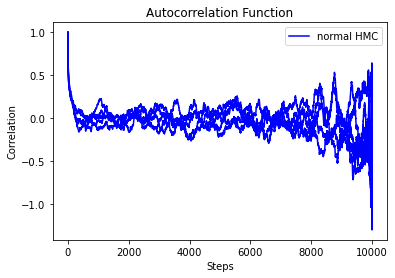

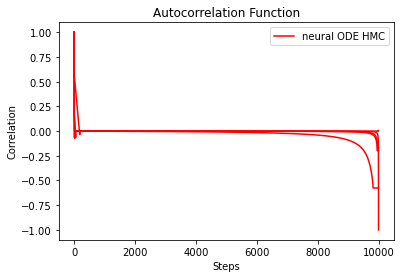

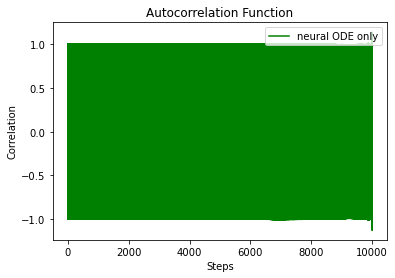

In [366]:
print(correlations[0].shape)
q = ['b', 'r', 'g']
labels = ['normal HMC', 'neural ODE HMC' , 'neural ODE only']
for index, i in enumerate(correlations):
    for index2, j in enumerate(i):
        if index2 == 0:
            plt.plot(delay, j, q[index], label=labels[index])
        else:
            plt.plot(delay, j, q[index])

    plt.legend()
    plt.title("Autocorrelation Function")
    plt.xlabel("Steps")
    plt.ylabel("Correlation")
    plt.show()

In [70]:
# class ODEFunc(nn.Module):
#     def __init__(self, twice_dim):
#         super(ODEFunc, self).__init__()
#         self.net = nn.Sequential(
#             nn.Linear(twice_dim, 50),
#             nn.ReLU(),
#             nn.Linear(50,50),
#             nn.ReLU(),
#             nn.Linear(50, twice_dim),
            
#         )
#         for m in self.net.modules():
#             if isinstance(m,nn.Linear):
#                 nn.init.normal_(m.weight,mean=0,std=0.01)
#                 nn.init.constant_(m.bias,val=0)
        
#     def forward(self, t, y):
        
#         #print(y.shape)
# #         print(y)
#         out = self.net(y)
#         #out = torch.ones(y.shape)
#         #out[:,0] = y[:,2]
#         #out[:,1] = y[:,3]
#         #out[:,2] = y[:,0]/(0.6666**2)
#         #out[:,3] = y[:,1]/(0.3333**2)
        
#         return out

class ODEFunc(nn.Module):
    def __init__(self, twice_dim):
        super(ODEFunc, self).__init__()
        self.dim = twice_dim // 2
        
        self.net1 = nn.Sequential(
            nn.Linear(self.dim, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50, self.dim),   
        )
        
        for m in self.net1.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)

        self.net2 = nn.Sequential(
            nn.Linear(self.dim, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50, self.dim),   
        )
        
        for m in self.net2.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)
                                

        
    def forward(self, t, y):
        
#         print(y.shape)
#         print(y)
        print(self.dim)
        q,p = torch.split(y, self.dim, dim=1)
        p_out = self.net1(q)
        q_out = self.net2(p)
        out = torch.cat((q_out, p_out), dim=1)
        #out = torch.ones(y.shape)
        #out[:,0] = y[:,2]
        #out[:,1] = y[:,3]
        #out[:,2] = y[:,0]/(0.6666**2)
        #out[:,3] = y[:,1]/(0.3333**2)
        
        return out

    
func = torch.load('10d_gaussian/model_constrained')

In [71]:
t = torch.Tensor([0])
qp = torch.Tensor([0 for i in range(20)]).view(1, -1)
func.forward(t, qp)

10


tensor([[-0.0175,  0.0062,  0.0078,  0.0060, -0.0063, -0.0056, -0.0041, -0.0046,
         -0.0022, -0.0019,  0.0001,  0.0015,  0.0126,  0.0199,  0.0047, -0.0021,
          0.0118, -0.0120,  0.0084, -0.0120]], grad_fn=<CatBackward0>)

10


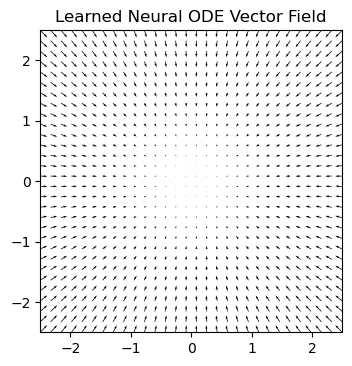

In [72]:
interval = np.linspace(-2.5,2.5,30)
coords = []
x = []
y = []
for i in interval:
    for j in interval:
        x.append(i)
        y.append(j)
        q = [0 for i in range(20)]
        q[0] = i
        q[1] = j
        coords.append(q)

qp = torch.Tensor(coords)
t = torch.Tensor([0])

out = func.forward(t, qp).detach().numpy()

u = out[:, 10]
v = out[:, 11]

# norm = np.linalg.norm(np.array((u, v)), axis=0)
# u = u / norm
# v = v / norm

plt.quiver(x,y,u,v)
plt.title('Learned Neural ODE Vector Field')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
axes=plt.gca()
axes.set_aspect(1)
plt.savefig('test.png', dpi=300)
plt.show()

In [82]:
class ODEFunc(nn.Module):
    def __init__(self, twice_dim):
        super(ODEFunc, self).__init__()
        self.dim = twice_dim // 2
        
        self.net1 = nn.Sequential(
            nn.Linear(self.dim, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50, self.dim),   
        )
        
        for m in self.net1.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)

        self.net2 = nn.Sequential(
            nn.Linear(self.dim, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50, self.dim),   
        )
        
        for m in self.net2.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)
                                

        
    def forward(self, t, y):
        
#         print(y.shape)
#         print(y)
        q,p = torch.split(y, self.dim, dim=1)
        p_out = self.net1(q)
        q_out = self.net2(p)
        out = torch.cat((q_out, p_out), dim=1)
        #out = torch.ones(y.shape)
        #out[:,0] = y[:,2]
        #out[:,1] = y[:,3]
        #out[:,2] = y[:,0]/(0.6666**2)
        #out[:,3] = y[:,1]/(0.3333**2)
        
        return out

func = torch.load('wofe_quapp/model_constrained_halved')

In [83]:
twice_dim = 4
t = torch.Tensor([0])
qp = torch.Tensor([0, 0, 0, 0]).reshape(1, -1)
func.forward(t, qp)

tensor([[-0.0147, -0.0138, -0.6643,  0.1815]], grad_fn=<CatBackward0>)

In [ ]:
interval = np.linspace(-2.5,2.5,40)
coords = []
x = []
y = []
for i in interval:
    for j in interval:
        x.append(i)
        y.append(j)
        q = [0 for i in range(twice_dim)]
        q[0] = i
        q[1] = j
        coords.append(q)

qp = torch.Tensor(coords)
t = torch.Tensor([0])

out = func.forward(t, qp).detach().numpy()

u = out[:, -2]
v = out[:, -1]

norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

plt.quiver(x,y,u,v)
plt.title('Learned Neural ODE Vector Field')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
axes=plt.gca()
axes.set_aspect(1)
plt.savefig('test.png', dpi=300)
plt.show()

# Dynamics Comparison

In [295]:
potential = '2d_shell'

In [296]:
trajs = np.load(f'{potential}/trajs.npy')
i = np.random.randint(trajs.shape[0])
init = torch.Tensor(trajs[i, 0])
dt = 0.01
batch_length = 100

In [297]:
class ODEFunc(nn.Module):
    def __init__(self, twice_dim):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(twice_dim, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50, twice_dim),
            
        )
        for m in self.net.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)
        
    def forward(self, t, y):
        
        #print(y.shape)
        out = self.net(y)
        #out = torch.ones(y.shape)
        #out[:,0] = y[:,2]
        #out[:,1] = y[:,3]
        #out[:,2] = y[:,0]/(0.6666**2)
        #out[:,3] = y[:,1]/(0.3333**2)
        
        return out


func = torch.load(f'{potential}/model')
# qs = [0 for i in range(twice_dim//2)]
# ps = [np.random.randn()*0.7 for i in range(twice_dim//2)]
# init = torch.tensor(qs+ps)
print(init)

batch_t = torch.linspace(0.0,dt*(batch_length-1),batch_length)
pred_y_mix = odeint_adj(func, init, batch_t)
# print(pred_y.shape)

# plt.plot(pred_y[:,0].detach().numpy(),pred_y[:,1].detach().numpy())
# plt.show()

tensor([ 0.5658,  0.7248,  0.4558, -0.5858])


In [1]:
class ODEFunc(nn.Module):
    def __init__(self, twice_dim):
        super(ODEFunc, self).__init__()
        self.dim = twice_dim // 2
        
        self.net1 = nn.Sequential(
            nn.Linear(self.dim, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50, self.dim),   
        )
        
        for m in self.net1.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)

        self.net2 = nn.Sequential(
            nn.Linear(self.dim, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50, self.dim),   
        )
        
        for m in self.net2.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)
                                

        
    def forward(self, t, y):
        
#         print(y.shape)
#         print(y)
        q,p = torch.split(y, self.dim, dim=1)
        p_out = self.net1(q)
        q_out = self.net2(p)
        out = torch.cat((q_out, p_out), dim=1)
        #out = torch.ones(y.shape)
        #out[:,0] = y[:,2]
        #out[:,1] = y[:,3]
        #out[:,2] = y[:,0]/(0.6666**2)
        #out[:,3] = y[:,1]/(0.3333**2)
        
        return out


func = torch.load(f'{potential}/model_constrained')
init = init.view(1, -1)
print(init)

batch_t = torch.linspace(0.0,dt*(batch_length-1),batch_length)
pred_y_constrained = odeint_adj(func, init, batch_t)
# print(pred_y.shape)

# plt.plot(pred_y[:,0,0].detach().numpy(),pred_y[:,0,1].detach().numpy())
# plt.show()

NameError: name 'nn' is not defined

In [299]:
print(trajs[i,0,:])
print(pred_y_constrained[:,0,1])

[ 0.56581903  0.72484402  0.4558318  -0.58582153]
tensor([0.7248, 0.7193, 0.7138, 0.7085, 0.7032, 0.6981, 0.6931, 0.6881, 0.6833,
        0.6786, 0.6741, 0.6696, 0.6652, 0.6610, 0.6568, 0.6528, 0.6489, 0.6451,
        0.6415, 0.6379, 0.6345, 0.6312, 0.6280, 0.6250, 0.6220, 0.6192, 0.6165,
        0.6138, 0.6113, 0.6088, 0.6065, 0.6043, 0.6022, 0.6002, 0.5983, 0.5965,
        0.5949, 0.5933, 0.5919, 0.5906, 0.5894, 0.5883, 0.5873, 0.5865, 0.5857,
        0.5851, 0.5845, 0.5841, 0.5838, 0.5836, 0.5835, 0.5836, 0.5837, 0.5840,
        0.5843, 0.5848, 0.5854, 0.5861, 0.5869, 0.5878, 0.5888, 0.5899, 0.5912,
        0.5925, 0.5939, 0.5955, 0.5971, 0.5988, 0.6006, 0.6025, 0.6045, 0.6065,
        0.6086, 0.6108, 0.6130, 0.6153, 0.6176, 0.6200, 0.6223, 0.6247, 0.6271,
        0.6295, 0.6319, 0.6342, 0.6365, 0.6387, 0.6409, 0.6430, 0.6451, 0.6470,
        0.6489, 0.6507, 0.6524, 0.6541, 0.6557, 0.6571, 0.6586, 0.6599, 0.6611,
        0.6623], grad_fn=<SelectBackward0>)


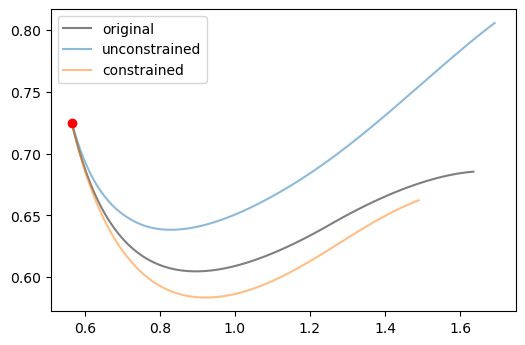

In [300]:
plt.plot(trajs[i,:,0],trajs[i,:,1], 'black', label='original',alpha=0.5)
plt.plot(pred_y_mix[:,0].detach().numpy(),pred_y_mix[:,1].detach().numpy(), label='unconstrained', alpha=0.5)
plt.plot(pred_y_constrained[:,0,0].detach().numpy(),pred_y_constrained[:,0,1].detach().numpy(), label='constrained', alpha=0.5)
plt.plot(trajs[i,0,0],trajs[i,0,1], 'ro')
plt.legend()
plt.show()

# 3D Contour Plot of NN

In [86]:
import torch.nn as nn
import torch

class ODEFunc(nn.Module):
    def __init__(self, dim, width, depth):
        super(ODEFunc, self).__init__()
        self.dim = dim
        
        layers = []
        for i in range(depth):
            if i == 0:
                layers += [nn.Linear(self.dim, width), nn.Sigmoid()]
            if i == (depth-1):
                layers += [nn.Linear(width, 1)]
            else:
                layers += [nn.Linear(width, width), nn.Sigmoid()]
        self.net = nn.Sequential(*layers)
        
        # self.net = nn.Sequential(
        #     nn.Linear(self.dim, width),
        #     nn.Sigmoid(),
        #     nn.Linear(width,width),
        #     nn.Sigmoid(),
        #     nn.Linear(width, self.dim),
            
        # )
        for m in self.net.modules():
            if isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,mean=0,std=0.01)
                nn.init.constant_(m.bias,val=0)


        # HACK
        m = 1.0
        self.mass = m*m/(m+m)

    def forward(self, state):
        
        with torch.set_grad_enabled(True):        
            
            v = state[0]
            q = state[1]
            
            q.requires_grad = True
            u = self.net(q)

            f = 0

            
            dvdt = f / self.mass
            dqdt = v
            
            
        return (dvdt, dqdt)

    def compute_grad(self, q, dq):
        # using this over compute_grad from nff seems to make no difference
        # HACK: does this only work with q_n => n=1? 
        return (self.net(q+dq) - self.net(q-dq)) / (2 * dq)

func = torch.load('results/10d_gaussian/fully_trained/5_model.pt').to('cpu')

def Gaussian2D(X, Y):
    V = 0.5*(X**2 + Y**2)
    # grad = q/(sigma**2)
    grad = 0
    return V, grad

def Shell2D(X, Y):
    r0 = np.sqrt(2)
    sigma = 0.5
    r = np.sqrt(X**2 + Y**2)
    V = abs(r-r0)/sigma
    
    # if (r-r0) == 0 or r == 0:
    #     grad = np.array([0, 0])
    # else:
    #     grad = (q*(r-r0)/(sigma*r*abs(r-r0)))
    grad = 0    
    return V, grad

def Wofe_Quapp(x, y):
    V = x**4 + y**4 - 2*x**2 - 4*y**2 + x*y + 0.3*x + 0.1*y
    grad = np.array([4*x**3 - 4*x + y + 0.3, 4*y**3 - 8*y + x + 0.1])
    return V, grad
        

In [47]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

print(func.net(torch.tensor([[float(0) for i in range(10)]]).to('cpu')))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,5))
fig.suptitle('Vertically stacked subplots')

for ax in axs.flat:
    ax.set_aspect('equal')

start, stop, n_values = -5, 5, 100

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

XY = np.stack([X,Y], axis=2)

XY = XY.reshape(-1, 2)

Z = func.net(torch.Tensor(XY)).detach().cpu().reshape(n_values, n_values).numpy()
Z -= Z.min()



axs[0].contourf(X, Y, Z, levels=100, cmap='YlGnBu_r')

axs[0].set_title('Contour Plot')
axs[0].set_xlabel('x (cm)')
axs[0].set_ylabel('y (cm)')


x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z, _ = Gaussian2D(X, Y)

cp = axs[1].contourf(X, Y, Z, levels=100, cmap='YlGnBu_r')
# cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(cp)


axs[1].set_title('Contour Plot')
axs[1].set_xlabel('x (cm)')
axs[1].set_ylabel('y (cm)')
plt.show()


tensor([[-17.1661]], grad_fn=<AddmmBackward0>)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10000x2 and 10x50)

In [14]:
print(func.net(torch.tensor([[0.0,0.0]])))
print(func.net(torch.tensor([[5.0,0.0]])))
print(func.net(torch.tensor([[-5.0,200.0]])))

tensor([[0.]], grad_fn=<AddmmBackward0>)
tensor([[4.1411]], grad_fn=<AddmmBackward0>)
tensor([[11.1832]], grad_fn=<AddmmBackward0>)


In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np

fig = plt.figure(figsize=(6, 4))

grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 3),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for ax in grid:
    ax.set_axis_off()
    im = ax.imshow(np.random.random((16,16)), vmin=0, vmax=1)

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im)

cbar.ax.set_yticks(np.arange(0, 1.1, 0.5))
cbar.ax.set_yticklabels(['low', 'medium', 'high'])
plt.show()

<ipython-input-55-8aca874aa030>:21: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  cbar = ax.cax.colorbar(im)
<ipython-input-55-8aca874aa030>:22: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  cbar = grid.cbar_axes[0].colorbar(im)


AttributeError: 'Colorbar' object has no attribute 'draw_all'

(100, 100)


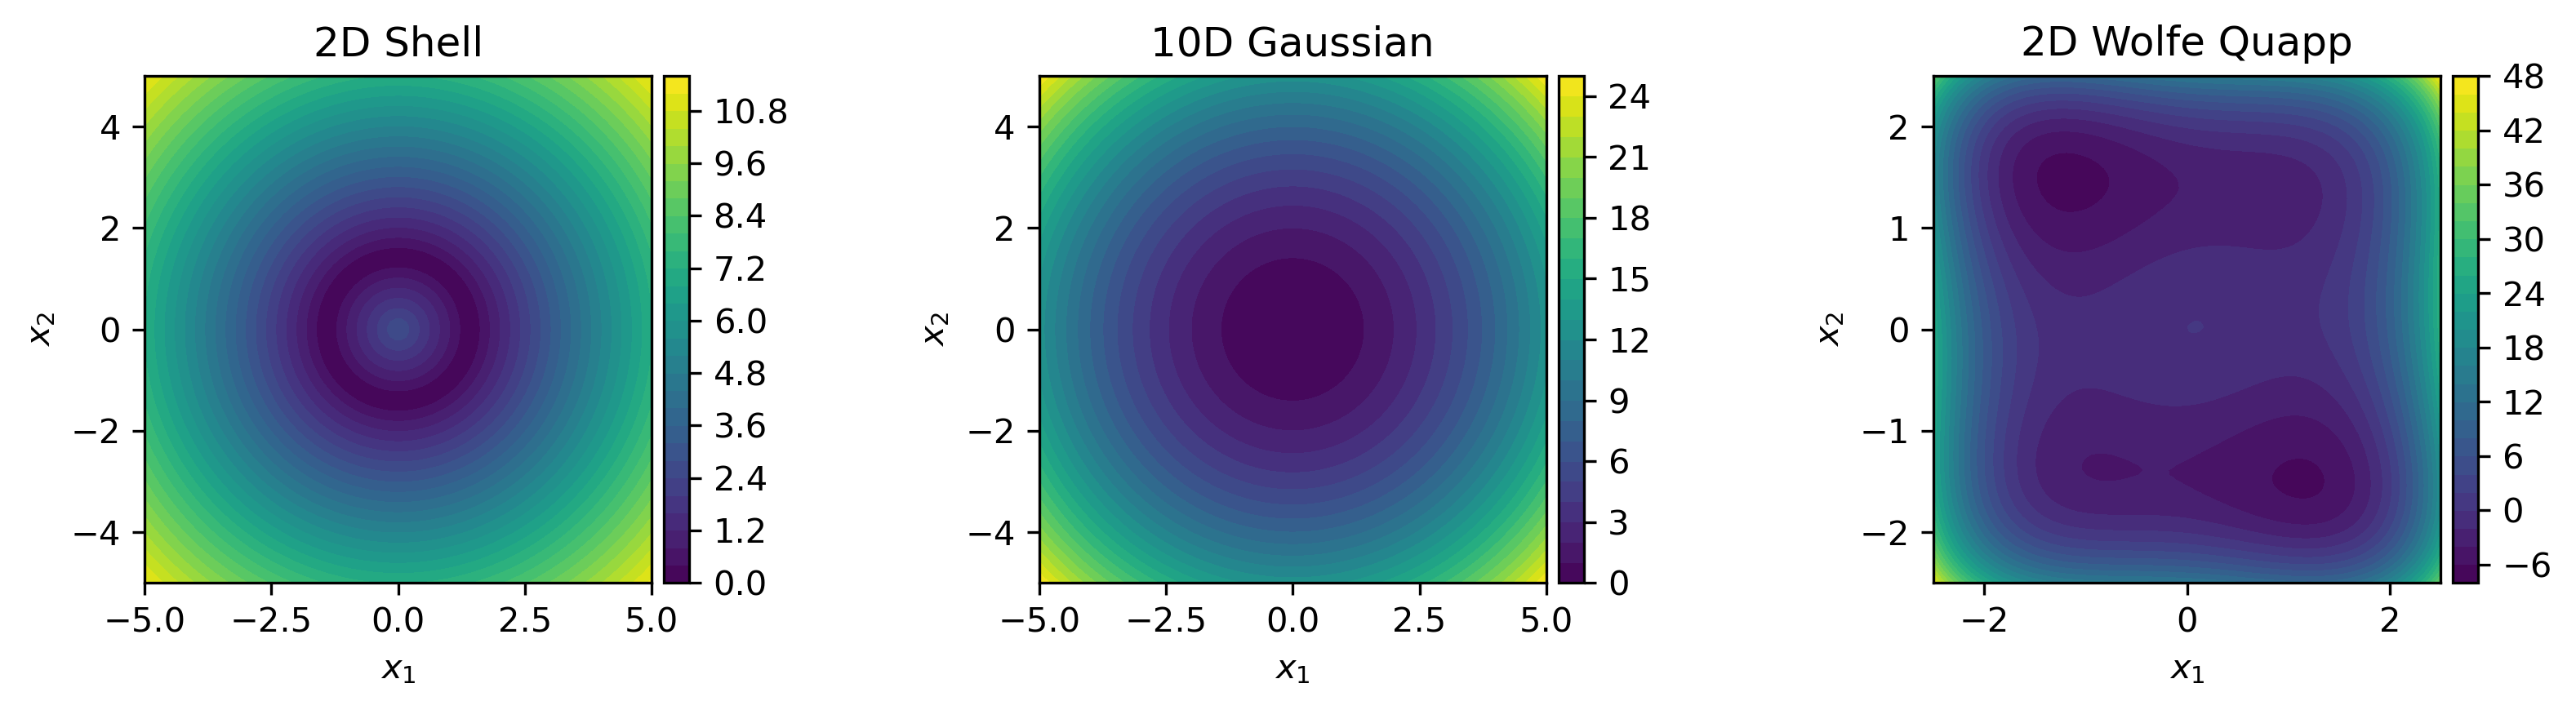

In [74]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

def Gaussian2D(X, Y):
    V = 0.5*(X**2 + Y**2)
    # grad = q/(sigma**2)
    grad = 0
    return V, grad

def Shell2D(X, Y):
    r0 = np.sqrt(2)
    sigma = 0.5
    r = np.sqrt(X**2 + Y**2)
    V = abs(r-r0)/sigma
    
    # if (r-r0) == 0 or r == 0:
    #     grad = np.array([0, 0])
    # else:
    #     grad = (q*(r-r0)/(sigma*r*abs(r-r0)))
    grad = 0    
    return V, grad

def Wofe_Quapp(X, Y):
    V = X**4 + Y**4 - 2*X**2 - 4*Y**2 + X*Y + 0.3*X + 0.1*Y
    # grad = np.array([4*x**3 - 4*x + y + 0.3, 4*y**3 - 8*y + x + 0.1])
    grad = 0
    return V, grad
        

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3), dpi=300)


for ax in axs.flat:
    ax.set_aspect('equal')

start, stop, n_values = -5, 5, 100
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)
XY = np.stack([X,Y], axis=2)
XY = XY.reshape(-1, 2)


Z, _ = Shell2D(X, Y)
im0 = axs[0].contourf(X, Y, Z, levels=30, cmap='viridis')
axs[0].set_title('2D Shell')
# axs[0].set_xlabel('x (cm)')
# axs[0].set_ylabel('y (cm)')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0,cax=cax)

start, stop, n_values = -2.0, 2.0, 100
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
mesh = np.meshgrid(x_vals, y_vals)
XY = np.stack([*mesh], axis=2)
XY = XY.reshape(-1, 2)


Z, _ = Gaussian2D(X, Y)
im1 = axs[1].contourf(X, Y, Z, levels=30, cmap='viridis')
axs[1].set_title('10D Gaussian')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1,cax=cax)

start, stop, n_values = -2.5, 2.5, 100
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)
XY = np.stack([X,Y], axis=2)
XY = XY.reshape(-1, 2)


Z, _ = Wofe_Quapp(X, Y)
im2 = axs[2].contourf(X, Y, Z, levels=30, cmap='viridis')
axs[2].set_title('2D Wolfe Quapp')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2,cax=cax)

axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')


axs[1].set_xlabel('$x_1$')
axs[1].set_ylabel('$x_2$')


axs[2].set_xlabel('$x_1$')
axs[2].set_ylabel('$x_2$')



fig.tight_layout()
plt.savefig('figures/toy_potentials.png')
plt.show()


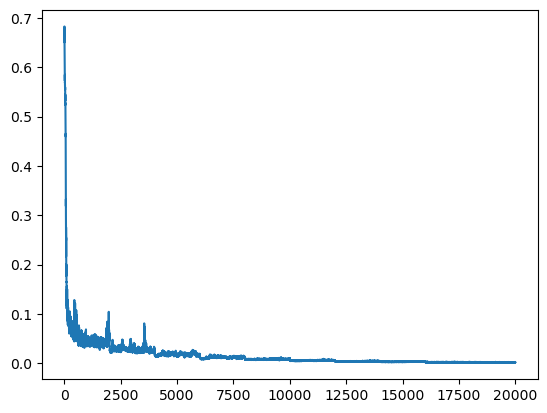

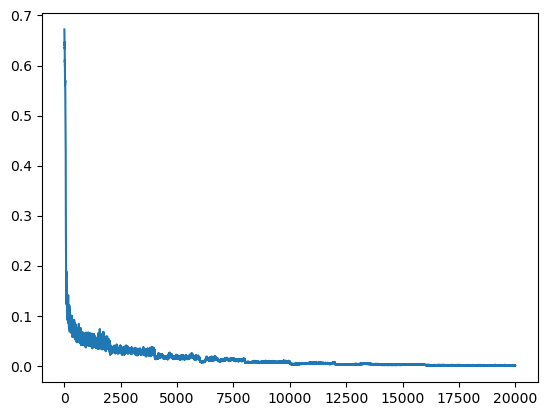

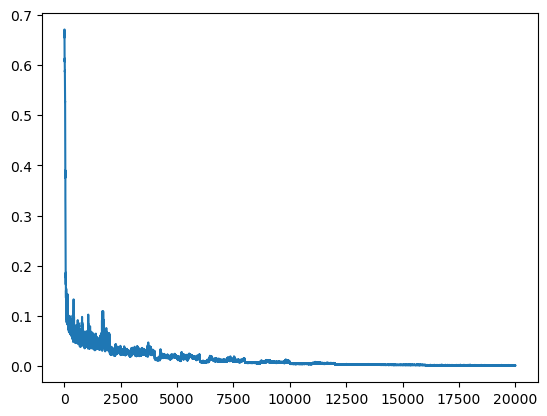

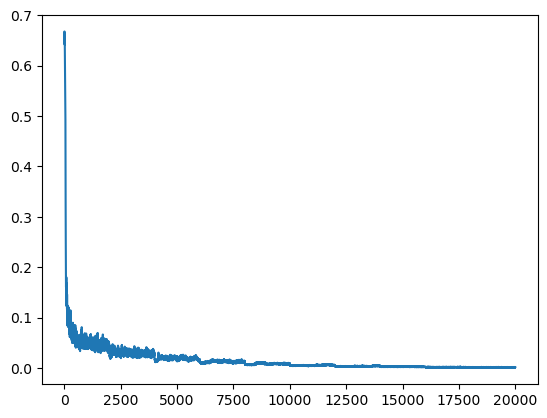

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# read text file into a list of floats
for i in range(1,5):
    with open(f'results/10d_gaussian/fully_trained/{i}_loss.txt', 'r') as f:
        lines = f.readlines()
        loss = [float(line.strip()) for line in lines]

    #plot loss
    plt.plot(loss)
    # plt.xlim(5000, 10000)
    # plt.ylim(0, 0.01)
    plt.show()

# with open('results/2d_shell/fully_trained/1_loss.txt', 'r') as f:
#     lines = f.readlines()
#     loss = [float(line.strip()) for line in lines]

# #plot loss
# plt.plot(loss)
# # plt.xlim(5000, 10000)
# plt.ylim(0, 0.01)
# plt.show()

In [37]:
import numpy as np
a = np.load('results/10d_gaussian/neural_hmc_exp/model_1/200/2_info.npy')
print(a)

[40.62656715  0.945     ]


tensor([[-90.4195]], grad_fn=<AddmmBackward0>)


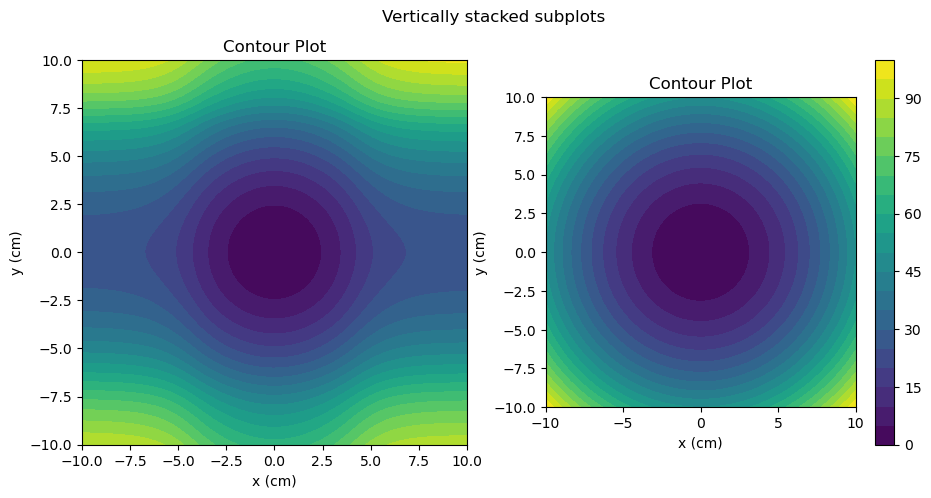

In [94]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

print(func.net(torch.tensor([[float(0) for i in range(10)]]).to('cpu')))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,5))
fig.suptitle('Vertically stacked subplots')

for ax in axs.flat:
    ax.set_aspect('equal')

start, stop, n_values = -10, 10, 100

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
mesh = np.meshgrid(x_vals, y_vals)
XY = np.stack([*mesh], axis=2)

Z = np.zeros((n_values, n_values))

for i in range(XY.shape[0]):
    for j in range(XY.shape[1]):
        inp = np.hstack((XY[i, j], np.array([float(0) for i in range(8)])))
        Z[i, j] = func.net(torch.Tensor(inp)).detach().cpu().item()

Z -= Z.min()


axs[0].contourf(X, Y, Z, levels=20, cmap='viridis')

axs[0].set_title('Contour Plot')
axs[0].set_xlabel('x (cm)')
axs[0].set_ylabel('y (cm)')


x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z, _ = Gaussian2D(X, Y)

cp = axs[1].contourf(X, Y, Z, levels=20, cmap='viridis')
# cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(cp)


axs[1].set_title('Contour Plot')
axs[1].set_xlabel('x (cm)')
axs[1].set_ylabel('y (cm)')
plt.show()
